In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from citipy import citipy 
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f9450c3fe316109af6bf71862b9411a


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
        # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | mahebourg
Processing Record 2 of Set 13 | jamestown
Processing Record 3 of Set 13 | atuona
Processing Record 4 of Set 13 | hobart
Processing Record 5 of Set 13 | constantine
Processing Record 6 of Set 13 | kapaa
Processing Record 7 of Set 13 | ostrovnoy
Processing Record 8 of Set 13 | barrow
Processing Record 9 of Set 13 | grindavik
Processing Record 10 of Set 13 | klaksvik
Processing Record 11 of Set 13 | saint-pierre
Processing Record 12 of Set 13 | port augusta
Processing Record 13 of Set 13 | castro
Processing Record 14 of Set 13 | ushuaia
Processing Record 15 of Set 13 | platanos
Processing Record 16 of Set 13 | meyungs
City not found. Skipping...
Processing Record 17 of Set 13 | cape town
Processing Record 18 of Set 13 | amderma
City not found. Skipping...
Processing Record 19 of Set 13 | naze
Processing Record 20 of Set 13 | north bend
Processing Record 21 of Set 13 | bafia
Processing Rec

Processing Record 29 of Set 16 | bengkulu
Processing Record 30 of Set 16 | miyang
Processing Record 31 of Set 16 | imbituba
Processing Record 32 of Set 16 | povoa de lanhoso
Processing Record 33 of Set 16 | santa cruz
Processing Record 34 of Set 16 | starobaltachevo
Processing Record 35 of Set 16 | avarua
Processing Record 36 of Set 16 | peniche
Processing Record 37 of Set 16 | liverpool
Processing Record 38 of Set 16 | okhotsk
Processing Record 39 of Set 16 | trincomalee
Processing Record 40 of Set 16 | glamoc
Processing Record 41 of Set 16 | camocim
Processing Record 42 of Set 16 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 16 | georgetown
Processing Record 44 of Set 16 | tynda
Processing Record 45 of Set 16 | tuatapere
Processing Record 46 of Set 16 | goderich
Processing Record 47 of Set 16 | taunggyi
Processing Record 48 of Set 16 | axim
Processing Record 49 of Set 16 | iqaluit
Processing Record 50 of Set 16 | jubb jannin
City not found. Skipping...
Process

Processing Record 14 of Set 20 | poronaysk
Processing Record 15 of Set 20 | hashtrud
Processing Record 16 of Set 20 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 20 | arlit
Processing Record 18 of Set 20 | imperial
Processing Record 19 of Set 20 | nueva imperial
Processing Record 20 of Set 20 | riesa
Processing Record 21 of Set 20 | mago
Processing Record 22 of Set 20 | ambulu
Processing Record 23 of Set 20 | maun
Processing Record 24 of Set 20 | japura
Processing Record 25 of Set 20 | kinablangan
Processing Record 26 of Set 20 | maceio
Processing Record 27 of Set 20 | langfang
Processing Record 28 of Set 20 | coquimbo
Processing Record 29 of Set 20 | cabo san lucas
Processing Record 30 of Set 20 | nivala
Processing Record 31 of Set 20 | yulara
Processing Record 32 of Set 20 | bentiu
Processing Record 33 of Set 20 | aljezur
Processing Record 34 of Set 20 | lodja
Processing Record 35 of Set 20 | port hardy
Processing Record 36 of Set 20 | shushenskoye


Processing Record 1 of Set 24 | stromness
Processing Record 2 of Set 24 | havre-saint-pierre
Processing Record 3 of Set 24 | bati
Processing Record 4 of Set 24 | waitati
Processing Record 5 of Set 24 | saint-joseph
Processing Record 6 of Set 24 | srednekolymsk
Processing Record 7 of Set 24 | lolua
City not found. Skipping...
Processing Record 8 of Set 24 | myanaung
Processing Record 9 of Set 24 | puerto el triunfo
Processing Record 10 of Set 24 | visakhapatnam
Processing Record 11 of Set 24 | udachnyy
Processing Record 12 of Set 24 | roald
Processing Record 13 of Set 24 | salinopolis
Processing Record 14 of Set 24 | makushino
Processing Record 15 of Set 24 | soe
Processing Record 16 of Set 24 | peruibe
Processing Record 17 of Set 24 | port victoria
Processing Record 18 of Set 24 | caraballeda
Processing Record 19 of Set 24 | tessalit
Processing Record 20 of Set 24 | warwick
Processing Record 21 of Set 24 | cherskiy
Processing Record 22 of Set 24 | hun
Processing Record 23 of Set 24 | s

In [7]:
len(city_data)

585

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.41,57.70,69.80,77,40,14.99,MU,2020-10-31 17:02:15
1,Jamestown,42.10,-79.24,39.99,69,90,10.29,US,2020-10-31 16:59:51
2,Atuona,-9.80,-139.03,78.17,76,17,17.83,PF,2020-10-31 17:02:15
3,Hobart,-42.88,147.33,55.40,62,90,9.17,AU,2020-10-31 17:00:25
4,Constantine,36.37,6.61,71.60,35,0,8.05,DZ,2020-10-31 17:02:15
5,Kapaa,22.08,-159.32,69.80,88,1,6.93,US,2020-10-31 17:02:15
6,Ostrovnoy,68.05,39.51,26.80,95,12,12.44,RU,2020-10-31 17:02:16
7,Barrow,71.29,-156.79,24.80,62,90,9.17,US,2020-10-31 17:01:03
8,Grindavik,63.84,-22.43,41.00,93,40,6.93,IS,2020-10-31 17:02:16
9,Klaksvik,62.23,-6.59,50.00,100,100,26.40,FO,2020-10-31 17:02:16


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604164281.8105159

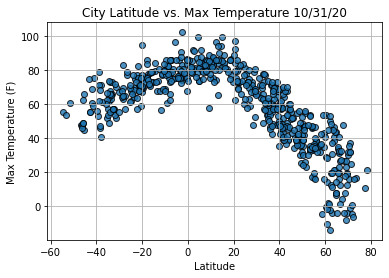

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

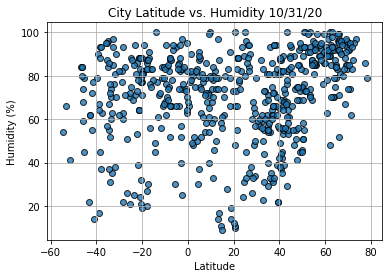

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()